In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import imageio

In [2]:
#create data
img_size = 100
a = np.linspace(0,20,img_size)
b = np.linspace(0,20,img_size)
data = np.asarray(np.meshgrid(a[::-1], b[::-1]))
data = data.reshape(2,img_size*img_size)
#repair data_bar
one = np.ones((1,data.shape[1]))
data = np.concatenate((data, one), axis = 0)
img = Image.open("pic100_100.png")
data_colour = np.asarray(img).reshape(img_size*img_size,3) * 1./255

In [3]:
def Render (data):
    fig = plt.figure()
    ax = plt.axes()
    ax.clear()
    ax.set_aspect('equal')
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.scatter(data[0],data[1],s = 1,c = data_colour)
    ax.scatter([data[0][0]],[data[1][0]],s = 30,c = "yellow")
    ax.scatter([data[0][img_size-1]],[data[1][img_size-1]],s = 30,c = "red")
    ax.scatter([data[0][img_size*img_size-img_size]],[data[1][img_size*img_size-img_size]],s = 30,c = "blue")
    ax.scatter([data[0][img_size*img_size-1]],[data[1][img_size*img_size-1]],s = 30,c = "green")  
    plt.xlim(-60,60)
    plt.ylim(-40,40)
    plt.draw()
    plt.savefig("fig.png")

In [20]:
def Translate(x,y):
  return np.array([[1,0,x],[0,1,y],[0,0,1]])
def Scale(w,h):
  return np.array([[w,0,0],[0,h,0],[0,0,1]])
def Rotate(theta):
  return np.array([[np.cos(theta),np.sin(theta),0],[-np.sin(theta),np.cos(theta),0],[0,0,1]])
def Shear_x(theta):
  return np.array([[1,np.tan(theta),0],[0,1,0],[0,0,1]])
def Shear_y(theta):
  return np.array([[1,0,0],[np.tan(theta),1,0],[0,0,1]])
def ReflectOrigin():
  return np.array([[-1,0,0],[0,-1,0],[0,0,1]])
def ReflectX():
  return np.array([[1,0,0],[0,-1,0],[0,0,1]])
def ReflectY():
  return np.array([[-1,0,0],[0,1,0],[0,0,1]])
def Origin():
  return np.array([[1,0,0],[0,1,0],[0,0,1]])

In [19]:
def Gif_create (Origin_Data,Trans_matrix,images):
    Origin_matrix = Origin()
    for t in np.linspace(0,1,10):
        Matrix = Origin_matrix + (Trans_matrix - Origin_matrix) * t
        New_Data = np.dot(Matrix,Origin_Data)
        Render(New_Data)
        images.append(imageio.imread("fig.png"))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


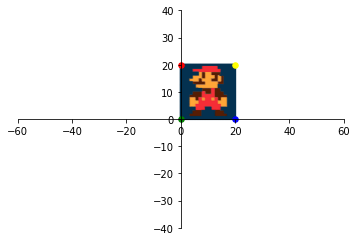

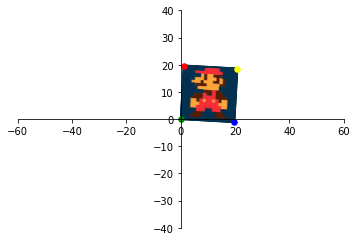

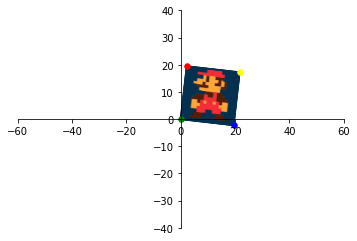

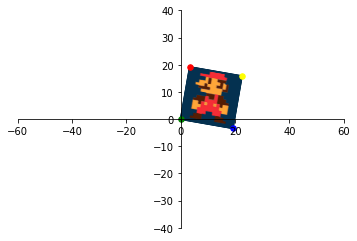

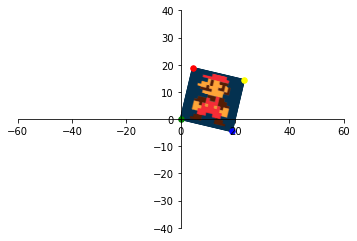

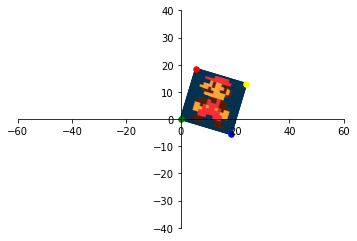

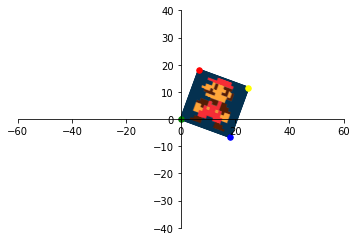

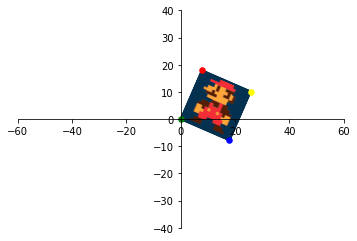

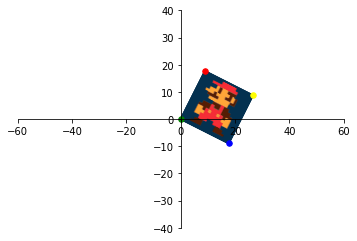

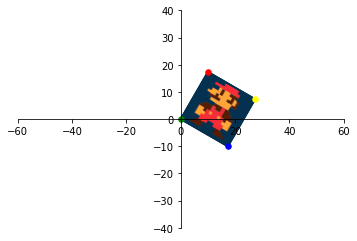

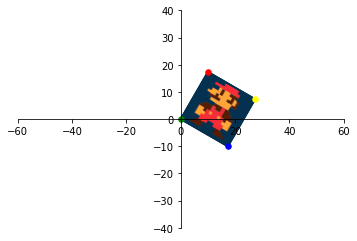

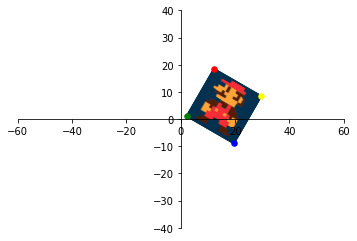

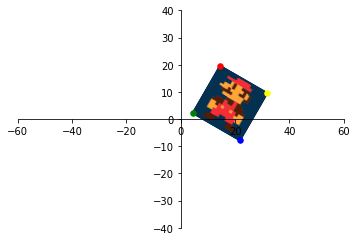

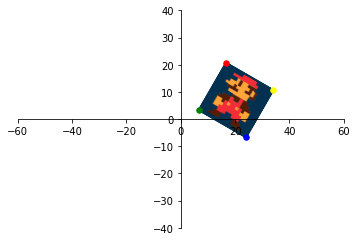

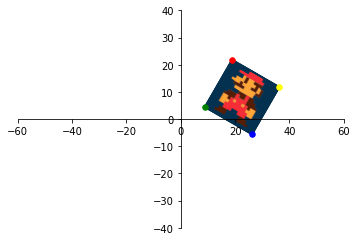

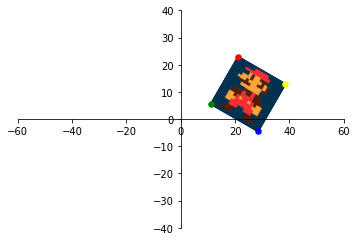

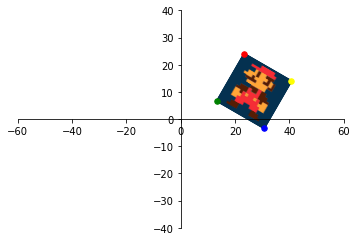

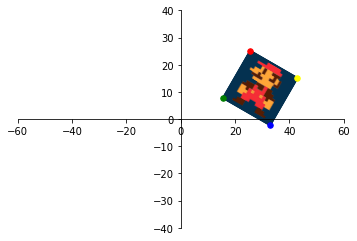

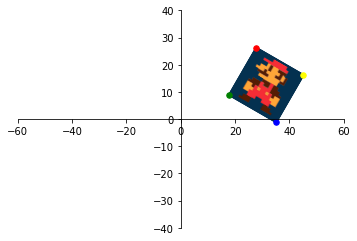

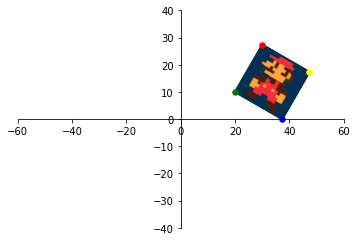

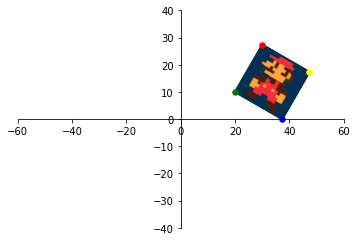

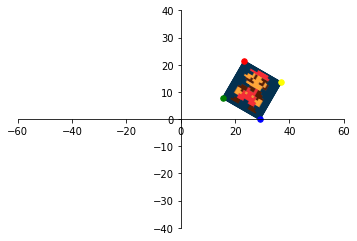

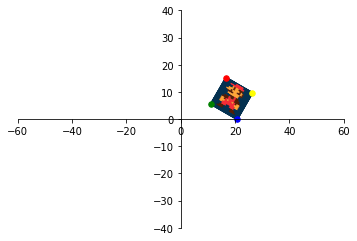

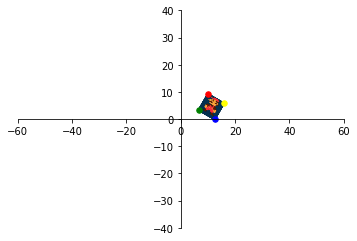

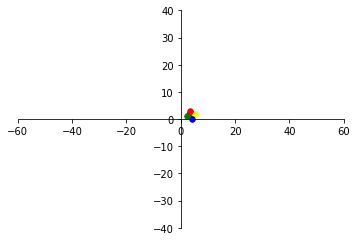

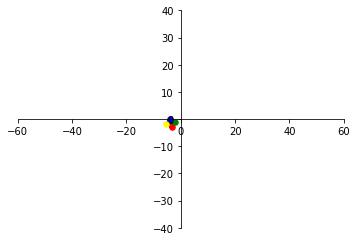

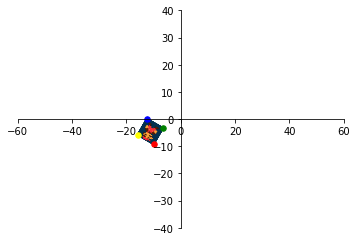

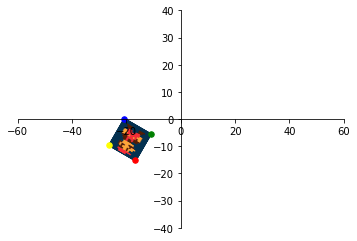

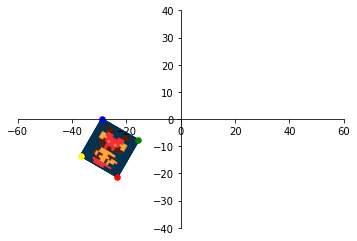

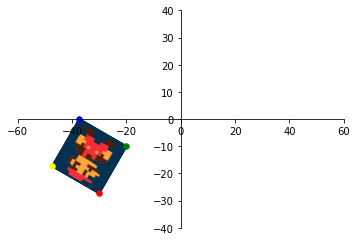

In [21]:
#ReflectY
images = []
Origin_Data = data
Trans_matrix = Rotate(np.pi/6)
Gif_create(Origin_Data,Trans_matrix,images)

Origin_Data = np.dot(Trans_matrix,Origin_Data)
Trans_matrix = Translate(20,10)
Gif_create(Origin_Data,Trans_matrix,images)

Origin_Data = np.dot(Trans_matrix,Origin_Data)
Trans_matrix = ReflectOrigin()
Gif_create(Origin_Data,Trans_matrix,images)

In [18]:
imageio.mimsave('P2_7.gif', images,duration = 2/5)